<img src="assets/images/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Experiments and Hypothesis Testing

---

<a id="learning-objectives"></a>
### Learning Objectives
- Explain the difference between causation and correlation
- Determine causality and sampling bias using directed acyclic graphs
- Identify what missing data is and how to handle it
- Test a hypothesis using a sample case study

<a id="home"></a>

### Lesson Guide
- [a) Data Source](#data-source)
	- [i) What Are the Features/Covariates/Predictors?](#what-are-the-featurescovariatespredictors)
	- [ii) What Is the Outcome/Response?](#what-is-the-outcomeresponse)
	- [iii) What Do You Think Each Row in the Data Set Represents?](#what-do-you-think-each-row-in-the-dataset-represents)
- [b) Causation and Correlation](#causation-and-correlation)
	- [i) The Structure of Causal Claims](#structure-of-causal-claims)
	- [ii) Why Do We Care?](#why-do-we-care)
	- [iii) How Do We Determine if Something is Causal?](#how-do-we-determine-if-something-is-causal)
 
    - [iv) Controlled Experiments](#controlled-experiments)  


- [c) Sampling Bias](#sampling-bias)
	- [i) Forms of Sampling Bias](#forms-of-sampling-bias)
	- [ii) Problems From Sampling Bias](#problems-from-sampling-bias)
	- [iii) Recovering From Sampling Bias](#recovering-from-sampling-bias)
    - [iv) Stratified Random Sampling](#stratified-random-sampling)

- [d) Missing Data and how we handle it](#missing-data)
	- [i) Types of Missing Data](#types-of-missing-data)
	- [ii) De Minimis](#de-minimis)
	- [iii) Class Imbalance](#class-imbalance)
    - [iv) Relation to Machine Learning](#relation-to-machine-learning)

- [e) Hypothesis Testing](#02)


<a id="data-source"></a>
# <font style = 'color:blue'>a) Data Source</font>

---

Today, we’ll use advertising data from an example in the book [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (you can download it for free from the author's site).
- This is a well-known, standard introduction to machine learning.
- The book has a more advanced version — [Elements of Statistical Learning](http://web.stanford.edu/~hastie/ElemStatLearn/) — if you are comfortable with linear algebra and statistics at the graduate level.

### <font style='color:green'>Code-Along: Bring in Today's Data</font>

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Read data into a DataFrame

# We use index_col to tell pandas that the first column in the data has row labels

data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: "On the basis of this data, <font style='color:red'>how should we spend our advertising money in the future?"</font>

<a id="what-are-the-featurescovariatespredictors"></a>
### <font style='color:green'>i) What are the Features/Covariates/Predictors?</font>

TV: Advertising dollars spent on TV for a single product in a 
given market (in thousands of dollars).    

Radio: Advertising dollars spent on radio (in thousands of dollars).


Newspaper: Advertising dollars spent on newspaper (in thousands of dollars).

<a id="what-is-the-outcomeresponse"></a>
### <font style='color:green'>ii) What Is the Outcome/Response?</font>

Sales of a single product in a given market (in thousands of widgets).

<a id="what-do-you-think-each-row-in-the-dataset-represents"></a>
### <font style='color:green'>iii) What Do You Think Each Row in the Data Set Represents?</font>

Every row in the data set refers to a market where the ads have been shown.

<a id="causation-and-correlation"></a>
# <font style = 'color:blue'>b) Causation and Correlation</font>

---

**Objective**: Explain the difference between causation and correlation.

Think of various examples of studies you’ve seen in the media related to food, for example: "[Study links coffee consumption to decreased risk of colorectal cancer](https://news.usc.edu/97761/new-study-links-coffee-consumption-to-decreased-risk-of-colorectal-cancer/)"

There's a whole book series based on these [Spurious Correlations](http://www.tylervigen.com/spurious-correlations).

What about this example?

![](assets/images/shark_attacks_vs_ice_cream_sales.jpg)

![](assets/images/cage_spurious_correlation.png)

**So, why are these spurious correlations so common?**

- Is it because of sensational headlines...?
- There's a neglect of robust data analysis.
- Causal claims and associations are difficult to convey in an unambiguous way.

The food claims above are **correlated** but may or may not be **causal**.

It's easy to always say "correlation does not imply causation", but we need to make decisions and **correlation is (pretty much) all we have**

<a id="structure-of-causal-claims"></a>
## <font style = 'color:blue'>i) The Structure of Causal Claims</font>

- If X happens, Y must happen.
- If Y happens, X must have happened.
  - (You need X and something else for Y to happen.)
- If X happens, Y will probably happen.
- If Y happens, X probably happened.

> **Note:** Properties from definitions are not causal. If some shape is a triangle, it's implied that it has three sides. However, it being a triangle does not _cause_ it to have three sides.

<a id="why-do-we-care"></a>
## <font style = 'color:blue'>ii) Why Do We Care?</font>

- Understanding this difference is critical for executing the data science workflow, especially when identifying and acquiring data.
- We need to fully articulate our question and use the right data to answer it while also considering any **confounders**.



> **Confounders** are unobserved variables that could affect the outcome. If we neglect to include confounding variables in an analysis, we could easily produce an inaccurate model. 

> For example, we might falsely assume that eating more ice cream cones causes us to wear fewer layers of clothing. In actuality, eating ice cream is correlated with a confounding variable — temperature! To perform an accurate analysis, we can only conclude that ice cream consumption is _correlated with_ clothing layers.

- We don’t want to overstate what our model measures.
- Be careful not to say “caused” when you really mean “measured” or “associated.”

- Most commonly, we find an association between two variables
    - There is an observed correlation between the variables
    - There is an observed correlation in a subset of data
    - We find that the descriptive statistics significantly differ in two subsets of data



- We may not still fully understand the causal direction (e.g. does smoking cause cancer or does cancer cause smoking?)
    - A causes B, B causes A, or a third factor causes both
        - A and B never cause each other!



- We also might not understand other factors influencing the association

### A Bit More On Confounders

Confounding variables often hide the true association between causes and outcomes.

Let’s say we performed an analysis to understand what causes lung cancer. 

We find that people who carry cigarette lighters are 2.4 times more likely to contract lung cancer than people who don’t carry lighters.

Does this mean that the lighters are causing cancer? Let's look at it using a DAG.

### What Is a DAG?

- DAG stands for directed acyclic graph; it's a collection of nodes connected by lines. 
- Each line has an arrow to point in a direction.
- If you follow the arrows, you reach a final node. There are no loops (that is what 'acyclic' means).
- A DAG always includes at least one exposure/predictor and one outcome.

A single circle or node in a causal DAG represents an event; something that happens at one point in time.

![](./assets/images/dag1.png)

If lighters and cancer are both caused by smoking, there will be a correlation between lighters and cancer. This isn't the only possible diagram, but it makes the most sense.
![](./assets/images/smoke-lighter-cancer.png)

If we believe the structure above, conditioning on smoking by only looking at non-smokers removes the correlation between lighters and cancer.

### When Is it OK to Rely on Association?

- **When any intervention that arises from your model affects only the outcome variable**
    - In other words, you only need to predict Y
    - This works because we only need to observe explanatory variables and implicitly know the confounders' effect
    - Decision-making and intervention based on your model are hidden dangers that can shift confounders
    - You can always retrain your model to work with a new set of confounders if they shift



- **When correlation is causal**
    - If you are sure there are no confounding factors or selection bias, then that association might be a causation (risky)
    - It's OK to exclude confounders that have very unlikely or small effects
    - This is a saving grace. To create a good model, you only need variables that correlate with your outcome
        - Those variables merely need to meaningfully correlate with your outcome

<a id="how-do-we-determine-if-something-is-causal"></a>
## <font style = 'color:blue'>iii) How Do We Determine if Something is Causal?</font>

Considering causal criteria is one approach to assessing causal relationships.

However, it’s hard to define universal causal criteria.

One attempt that's commonly used in the medical field is based on work published in 1965 by [Austin Bradford Hill](https://en.wikipedia.org/wiki/Bradford_Hill_criteria).  (He demonstrated the connection between cigarette smoking and lung cancer.)


He developed a list of nine “tests” that an analysis must pass in order to indicate a causal relationship:

<img src='./assets/images/BradfordHillCriteria.png'>

<font style = 'color:green'>**Strength of association (effect size)**:</font> A small association does not mean that there is not a causal effect, although the larger the association, the more likely the effect is to be causal.

<font style = 'color:orange'>**Consistency (reproducibility)**:</font> Consistent findings observed by different persons in different places with different samples strengthens the likelihood of an effect.

<font style = 'color:red'>**Specificity**:</font> Causation is likely if there is a very specific population at a specific site and a disease with no other likely explanation. The more specific an association between a factor and an effect, the greater the probability of a causal relationship.

<font style = 'color:green'>**Temporality**:</font> The effect has to occur after the cause (and, if there is an expected delay between the cause and expected effect, then the effect must occur after that delay).

<font style = 'color:blue'>**Biological gradient (also known as dose-response)**:</font> Greater exposure should generally lead to greater incidence of the effect. However, in some cases, the mere presence of the factor can trigger the effect. In other cases, an inverse proportion is observed: greater exposure leads to lower incidence.

<font style = 'color:orange'>**Plausibility**:</font> A plausible mechanism between cause and effect is helpful (but Hill noted that knowledge of the mechanism is limited by current knowledge).

<font style = 'color:red'>**Coherence**:</font> Coherence between epidemiological and laboratory findings increases the likelihood of an effect. However, Hill noted that "... lack of such [laboratory] evidence cannot nullify the epidemiological effect on associations."

<font style = 'color:blue'>**Experimental evidence**:</font> "Occasionally it is possible to appeal to experimental evidence."

<font style = 'color:green'>**Analogy**:</font> The effect of similar factors may be considered.

As the above shows, **it is important to have - or have access to - deep subject area knowledge of what you are analysing.  This is known as <font style = 'color:red'>'domain expertise'.</font>**


You'll develop this over time and it will help you move through your analysis in a logical manner. However, keep in mind that you can show a strong association and still be wrong.

<a id="controlled-experiments"></a>
## <font style = 'color:blue'>iv) Controlled Experiments</font>

- The most foolproof way to measure an effect is to control all of the confounders and directly intervene and control our variable of interest
- This way we know that any correlation we find is not because of the confounders but instead because of the variable we control
- This also means that all the effects we see are due to the variable we control
- However, experiments are not always possible and take longer than using observational data

### <font style='color: green'>CodeAlong: Explore the Associations in the Advertising Data</font>

#### Visualize the relationship between the features and the response using scatterplots.

- Below, we filled in how to make a scatterplot for the columns `sales` vs `TV`. 
- Using this as an example, can you also make scatterplots for `sales` vs `radio` and `sales` vs `newspaper`?
- `axs[0]` is the first coordinate grid, `axs[1]` is the second coordinate grid, etc.

In [7]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


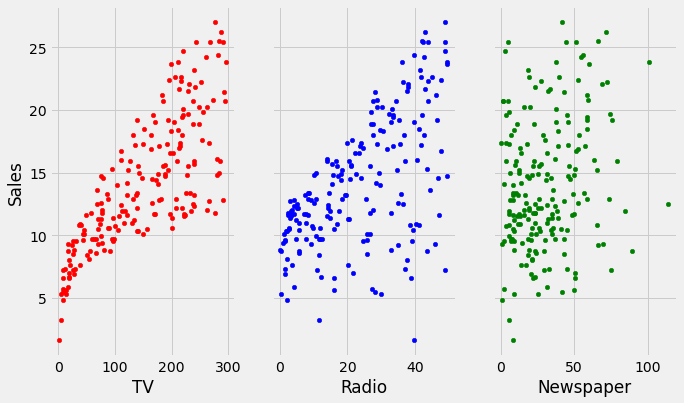

In [6]:
# Visualize the relationship between the features and the response using scatterplots:
fig, axs = plt.subplots(1, 3, sharey=True)

data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], color='red', figsize=(10, 6));
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], color='blue');
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], color='green');

#### Is there a relationship between ads and sales? Which type of ads?

There appears to be a relationship. 

The relationship appears strongest between TV and sales.

#### Can we say this a causal relationship?

Probably, yes.

#### What other questions might we want to know about this data?

- How strong is that relationship?
- Which ad types contribute to sales?
- What is the effect of each ad type on sales?
- Given ad spending in a particular market, can sales be predicted?

### Section Summary

1) **It's important to have deep subject area knowledge (also known as 'domain expertise').** You'll develop this over time and it will help you move through your analysis in a logical manner. However, keep in mind that you can show a strong association and still be wrong.

2) **A DAG (directed acyclic graph) can be a handy tool for thinking through the logic of your models.**

3) **There is a distinction between causation and correlation.** In our smoking example, it's relatively obvious that there's a flaw in our logic; however, this won't always be so readily apparent — especially in cutting-edge fields where there are many other unknown variables.

4) **Good data are essential.** Throughout this course we will be developing your data intuition so you can spot gaps and bias more readily. You'll also be introduced to tools that can help. However, your analysis is only as good as your understanding of the problem and the data.

<a id="sampling-bias"></a>
# <font style = 'color:blue'>c) Sampling Bias</font>
---

**Sampling bias** occurs when a sample is collected in such a way that some members of the intended population are more or less likely to be included than others.

This can happen when a sample is taken non-randomly — either implicitly or explicitly.



When we have non-random sampling that results in sampling bias, it can affect the inferences or results of our analyses. We must be sure not to attribute our results to the process we observe when they could actually be because of non-random sampling.

Conceptually, this is straightforward: when we have sampling bias, we aren't measuring what we think we are measuring.

<table><tr><td><img src='./assets/images/sampling_bias.jpg'></td><td><img src='./assets/images/truman.jpeg'></td></tr></table>


<a id="forms-of-sampling-bias"></a>
### Examples of Sampling Bias

- **Pre-screening:** Purposely restricting the sample to a specific group or region.
    - This typically happens when people try to study priority areas to save costs and assume priority areas are the same as random areas.
- **Self-selection:** When someone has the ability to non-randomly decide what is included in a sample.
    - This typically happens in surveys and polls but can also be an issue with other kinds of reporting.
- **Survivorship bias:** When we select only surviving subjects in a sample over time.
    - This might happen when we only look at existing customers and assume they have the same characteristics as new customers.

<img src='./assets/images/airplanes.jpeg'>

<a id="problems-from-sampling-bias"></a>
### Problems That Arise From Sampling Bias
- We could overestimate or underestimate means and sample statistics for simple characteristics.
- It's possible to have artificial correlation where there should be none.

<a id="recovering-from-sampling-bias"></a>
### Recovering From Sampling Bias
- Working out causal DAGs can help you identify when to watch out for sampling bias.
- Generally, it's best to prevent sampling bias whenever possible.
- We can't really do anything if we ENTIRELY exclude an important group of data.
- However, if portions of our data are overrepresented or underrepresented, there are ways to correct that effect.
    - Typically, we explicitly model the selection process, which means we need data on factors that determine whether  or not someone participates.

<a id="stratified-random-sampling"></a>
### Stratified Random Sampling

We've discussed how it is important to obtain a random sample of our population. However, sometimes it is more effective to apply some reasoning to our sampling process. By optimizing how we choose samples, we can possibly create a more accurate model using fewer samples.



- **Stratified random sampling** ensures we capture important population characteristics in the random sample. 

    - If we know that the population is half males and half females, for example, we can make sure that our sample is half male and half female. 
    - We effectively break the population into two "strata" (groups), then randomly sample from each group to obtain our overall sample. 
    - This method is similar to taking a weighted average and depends on knowing key population statistics.


- For example, if we are collecting survey data, we might ensure our participants are evenly split between men and women.

<a id="missing-data"></a>
# <font style = 'color:blue'>d) Missing Data and how we handle it</font>
---

Sometimes we are unable to collect every attribute for a particular observation, or we have missing data in a dataset we are given.

Unfortunately, this makes an observation unusable until we decide how to deal with it.

**We have to decide whether to:**
<br />
+ Drop the observation (row)
+ Drop the attribute (column)
+ Impute a value for that specific attribute and observation (estimate a value)

**So, how do we decide?**

<a id="types-of-missing-data"></a>
## <font style = 'color:blue'>i) Types of Missing Data</font>

Sometimes, missing data in our dataset will introduce sampling bias.  There are three main types of missing data:



- **Missing completely at random (MCAR)**
    - The reason that the data are missing is completely random and introduces no sampling bias
    - In this case, it's safe to drop or impute
    - We can test for this by looking at other attributes for missing and non-missing groups to see if they match



- **Missing at random (MAR)**
    - The data are missing in a way that is related to another factor (one of the independent variables)
    - This is a form of sampling bias
    - Like other instances of sampling bias, we can fix this by modeling the selection process
        - This is done by building a model to impute the missing value based on other variables



- **Missing not at random (MNAR)**
    - The response (dependent variable) is missing in a way that relates to its own value
    - We can't test for this
    - We also can't fix this in a reasonable way

### <font style='color:green'>Exercise</font>

Let's say we're modelling IQ as a function of age. Based on the complete data set on the left, which type of missing data do you think each of these three are?

<img src = './assets/images/missing_data.png'>

- 1st column is complete data

- 2nd column is MNAR: there is IQ data missing for scores below 110, which means we cannot model our target well

- 3rd column is MAR: IQ scores for people younger than 44 are missing

- 4th column is MCAR: there is data missing for IQ for certain ages, but ages are seemingly random, and the example

IQ scores range from 91 to 118, covering most of the range of the complete dataset

<a id="de-minimis"></a>
## <font style = 'color:blue'>ii) De Minimis</font>

- If few enough observations are missing, it's not likely to change our results to a meaningful degree
- In these cases, we don't have to bother with trivialities and simply pick a method that works well enough

<a id="class-imbalance"></a>
## <font style = 'color:blue'>iii) Class Imbalance</font>

Sometimes a sample may include an over-representation of one type of class. 

For example, airport security may have 990 X-ray scans showing the absence of a weapon. 

Due to natural scarcity, it may only provide 10 scans showing a weapon.



- If our goal is to create a model that indicates whether or not a weapon is present, then we are at a disadvantage. **Ignoring the class imbalance** would lead to a model that always guesses that a weapon is not present!
    - Note that most optimization procedures optimize for training data accuracy. Always guessing that a weapon is absent leads to 990/1000 correct results; an accuracy of 99 percent.



- A simple way to get around this is to **undersample** the majority class, deliberately leaving us with a balanced data set of 10 each. However, this is less than ideal, as it effectively ignores much of the available data.



- Alternatively, we could **oversample** the minority class by duplicating examples. Again, this is not ideal. Because we have very little data, this will magnify small differences that may just be errors, leading to a model that overfits.

Later in the course, we will look at additional methods for training models to work around class imbalance. For example, we may use an optimization algorithm that cares less about accuracy and more about minimizing particular types of errors.

More on [Learning from Imbalanced Classes](https://www.svds.com/learning-imbalanced-classes/)